# **MLProcess - Air Quality**
---
**2 - Data Understanding (EDA)**

In [2]:
# Import the required libraries.
import yaml
import joblib
import numpy as np
import pandas as pd

# Need to be installed.
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt

## **1 - Configuration File**
---

In [3]:
# Function to load configuration parameter.
def load_config(path_config):
    """
    Load the configuration file (config.yaml).

    Parameters:
    ----------
    path_config : str
        Configuration file location.

    Returns:
    -------
    params : dict
        The configuration parameters.
    """

    # Try to load config.yaml file.
    try:
        with open(path_config, 'r') as file:
            params = yaml.safe_load(file)
    except FileNotFoundError as err:
        raise RuntimeError(f"Configuration file not found in {path_config}")

    return params

In [5]:
# Load the configuration file.
PATH_CONFIG = "../config/config.yaml"
config = load_config(PATH_CONFIG)

In [6]:
# Check the configuration parameters.
config

{'columns_datetime': ['tanggal'],
 'columns_int': ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max'],
 'columns_object': ['stasiun', 'critical', 'category'],
 'features': ['stasiun', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2'],
 'label': 'category',
 'label_categories': ['BAIK', 'SEDANG', 'TIDAK SEHAT'],
 'path_joined_data': '../data/interim/joined_dataset.pkl',
 'path_raw_data': '../data/raw/',
 'path_test_set': ['../data/interim/X_test.pkl', '../data/interim/y_test.pkl'],
 'path_train_set': ['../data/interim/X_train.pkl',
  '../data/interim/y_train.pkl'],
 'path_valid_set': ['../data/interim/X_valid.pkl',
  '../data/interim/y_valid.pkl'],
 'path_validated_data': '../data/interim/validated_data.pkl',
 'range_co': [-1, 47],
 'range_no2': [-1, 65],
 'range_o3': [-1, 151],
 'range_pm10': [-1, 179],
 'range_pm25': [-1, 174],
 'range_so2': [-1, 82],
 'range_stasiun': ['DKI1 (Bunderan HI)',
  'DKI2 (Kelapa Gading)',
  'DKI3 (Jagakarsa)',
  'DKI4 (Lubang Buaya)',
  'DKI5 (Kebon Jeruk) Jakarta B

## **2 - Load Data**
---
**Note:** Do EDA only on the train set.

In [9]:
# Load the train set.
X_train = joblib.load(config["path_train_set"][0])
y_train = joblib.load(config["path_train_set"][1])

In [12]:
# Join X_train and y_train.
dataset = pd.concat(
    [X_train, y_train],
    axis = 1
)

In [13]:
# Check the joined train set.
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,category
320,DKI1 (Bunderan HI),65,95,27,14,17,32,SEDANG
1685,DKI1 (Bunderan HI),55,72,30,13,22,40,SEDANG
1093,DKI1 (Bunderan HI),50,64,31,19,18,35,SEDANG
31,DKI2 (Kelapa Gading),33,50,39,7,47,15,BAIK
1051,DKI5 (Kebon Jeruk) Jakarta Barat,67,118,29,16,28,31,TIDAK SEHAT
...,...,...,...,...,...,...,...,...
182,DKI2 (Kelapa Gading),27,51,15,7,77,15,SEDANG
1374,DKI1 (Bunderan HI),52,69,20,16,16,30,SEDANG
1495,DKI5 (Kebon Jeruk) Jakarta Barat,35,65,23,11,22,17,SEDANG
255,DKI4 (Lubang Buaya),89,-1,27,47,61,11,SEDANG


## **3 - Exploratory Data Analysis**
---
1. Missing Value Check
2. Skewness Check
3. Data Split
4. Visualization
5. Hypothesis Test
6. Imbalanced Label Check
7. Outliers Check

### **3.1. Missing Value Check**

In [16]:
# Replace the -1 values with NaN.
dataset = dataset.replace(-1, np.nan)

In [17]:
# Check the number of missing values.
dataset.isnull().sum()

stasiun      0
pm10        39
pm25        66
so2         76
co          13
o3          39
no2         14
category     0
dtype: int64

### **3.2. Skewness Check**

In [18]:
# Fisher-Pearson Skew values.
dataset.skew(numeric_only=True)

pm10   -0.215274
pm25    0.269003
so2     0.219990
co      1.823334
o3      1.496023
no2     0.851882
dtype: float64

**Insights:**
- `pm10` is left skewed, but not significant. The rest are right skewed.
- `co`, `o3`, and `no2` have skew values $> 0.5$, indicating a lot of outliers. We will impute using it's median.
- The rest will be imputed using it's mean.

### **3.3. Data Split**
---
Split the data by it's class.

In [19]:
dataset_baik = dataset[dataset["category"] == "BAIK"].copy()
dataset_tidak_baik = dataset[dataset["category"] != "BAIK"].copy()

In [20]:
# Kelas 1 => BAIK.
dataset_baik.describe()

,pm10,pm25,so2,co,o3,no2
count,142.000000,116.000000,147.000000,151.000000,147.000000,143.000000
mean,28.359155,39.827586,26.190476,8.900662,26.306122,10.937063
std,7.413177,8.347117,10.695239,4.324743,11.559028,5.934166
min,14.000000,13.000000,3.000000,2.000000,8.000000,3.000000
25%,23.250000,34.750000,18.000000,6.000000,16.000000,6.000000
50%,28.000000,41.000000,24.000000,8.000000,24.000000,10.000000
75%,32.000000,47.000000,36.000000,11.000000,36.500000,15.000000
max,50.000000,50.000000,50.000000,28.000000,49.000000,35.000000


In [22]:
# Kelas 0 => SEDANG & TIDAK SEHAT
dataset_tidak_baik.describe()

,pm10,pm25,so2,co,o3,no2
count,1269.000000,1268.000000,1227.000000,1286.000000,1264.000000,1293.000000
mean,55.178093,82.385647,36.398533,12.028771,32.825158,20.317092
std,12.905803,22.185030,12.413029,5.014061,14.651895,8.874512
min,19.000000,19.000000,2.000000,3.000000,9.000000,1.000000
25%,48.000000,67.000000,27.000000,9.000000,23.000000,14.000000
50%,55.000000,80.000000,37.000000,11.000000,29.000000,19.000000
75%,63.000000,96.000000,45.000000,14.000000,39.000000,26.000000
max,95.000000,174.000000,82.000000,47.000000,151.000000,65.000000


**Insights:**
- `pm10` and `pm25` mean between class 0 and 1 have a significant difference. We will impute using class mean.
- `so2` mean between class 0 and 1 have a slight difference. We will be impute using the mean.
- `co`, `o3`, and `no2` median between class 0 and 1 have a slight difference. We will impute using the median.

### **3.4. Visualization**

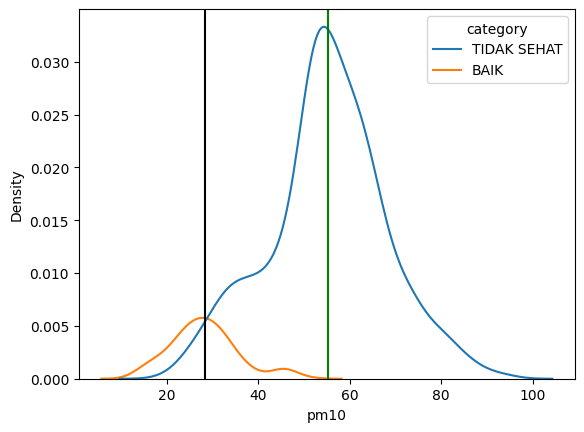

In [23]:
# pm10 column distribution.
sns.kdeplot(
    data = dataset.replace("SEDANG", "TIDAK SEHAT"),
    x = "pm10",
    hue = "category"
)
plt.axvline(dataset_tidak_baik["pm10"].mean(), 0, 1, color='g')
plt.axvline(dataset_baik["pm10"].mean(), 0, 1, color='k')
plt.show()

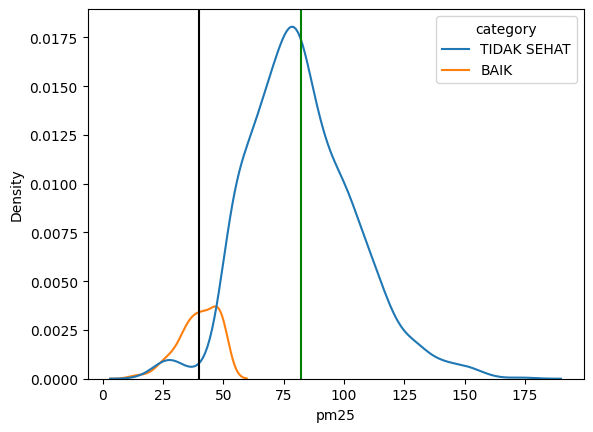

In [24]:
# pm25 column distribution.
sns.kdeplot(
    data = dataset.replace("SEDANG", "TIDAK SEHAT"),
    x = "pm25",
    hue = "category"
)
plt.axvline(dataset_tidak_baik["pm25"].mean(), 0, 1, color='g')
plt.axvline(dataset_baik["pm25"].mean(), 0, 1, color='k')
plt.show()

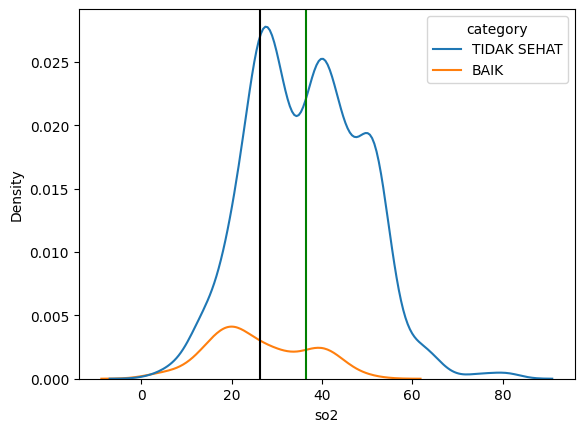

In [25]:
# so2 column distribution.
sns.kdeplot(
    data = dataset.replace("SEDANG", "TIDAK SEHAT"),
    x = "so2",
    hue = "category"
)
plt.axvline(dataset_tidak_baik["so2"].mean(), 0, 1, color='g')
plt.axvline(dataset_baik["so2"].mean(), 0, 1, color='k')
plt.show()

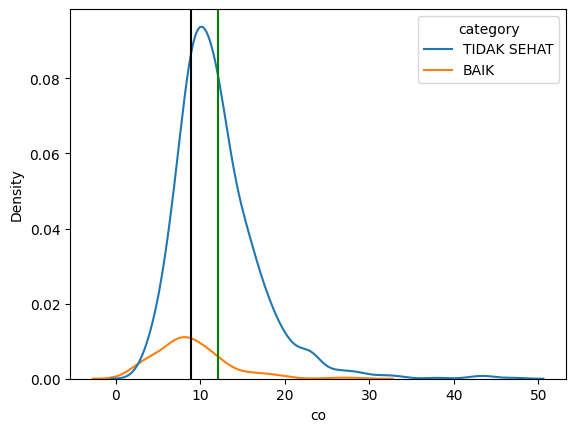

In [26]:
# co column distribution.
sns.kdeplot(
    data = dataset.replace("SEDANG", "TIDAK SEHAT"),
    x = "co",
    hue = "category"
)
plt.axvline(dataset_tidak_baik["co"].mean(), 0, 1, color='g')
plt.axvline(dataset_baik["co"].mean(), 0, 1, color='k')
plt.show()

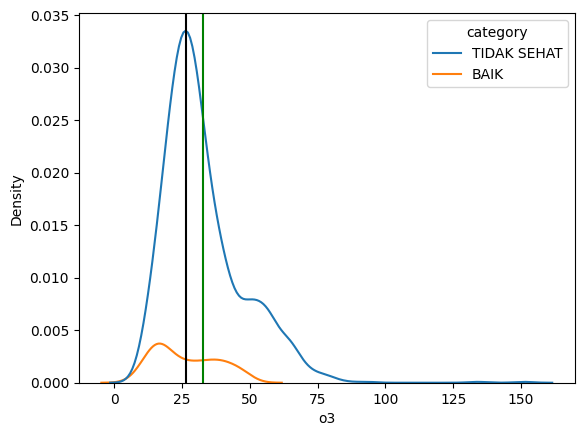

In [27]:
# o3 column distribution.
sns.kdeplot(
    data = dataset.replace("SEDANG", "TIDAK SEHAT"),
    x = "o3",
    hue = "category"
)
plt.axvline(dataset_tidak_baik["o3"].mean(), 0, 1, color='g')
plt.axvline(dataset_baik["o3"].mean(), 0, 1, color='k')
plt.show()

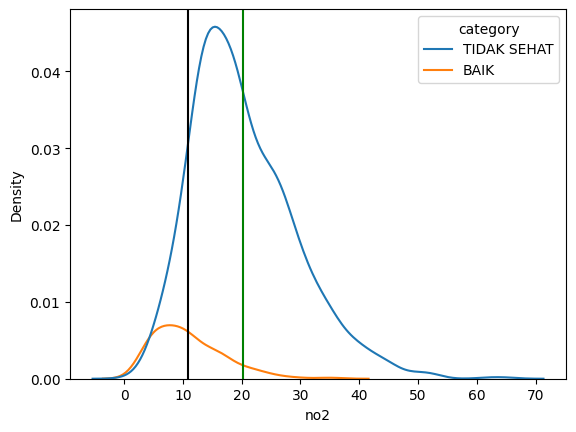

In [28]:
# no2 column distribution.
sns.kdeplot(
    data = dataset.replace("SEDANG", "TIDAK SEHAT"),
    x = "no2",
    hue = "category"
)
plt.axvline(dataset_tidak_baik["no2"].mean(), 0, 1, color='g')
plt.axvline(dataset_baik["no2"].mean(), 0, 1, color='k')
plt.show()

Let's check the correlation.

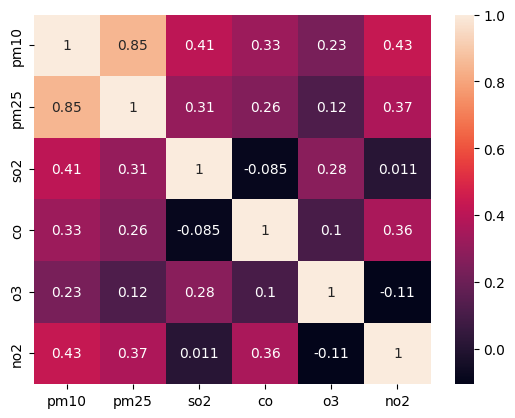

In [29]:
# Pearson Correlation.
sns.heatmap(
    dataset.corr(numeric_only=True),
    annot=True
)
plt.show()

### **3.5. Hypothesis Test**
---
T-Test (to check mean between 2 variables)

**Note:**
- $h_0$ (null hypothesis): mean of class 0 == mean of class 1.
- $h_1$ (alternative hypothesis): mean of class 0 != mean of class 1.
- $h_0$ and $h_1$ is *mutually exclusive* (if $h_0$ is true, $h_1$ is false, and vice versa).
- The goal of the test is to determine whether to reject the $h_0$.

In [31]:
# pm10 t-value.
scs.ttest_ind(
    dataset_baik[dataset_baik["pm10"].isnull() != True].pm10,
    dataset_tidak_baik[dataset_tidak_baik["pm10"].isnull() != True].pm10
)

TtestResult(statistic=np.float64(-24.313059445688953), pvalue=np.float64(2.5376288999100704e-109), df=np.float64(1409.0))

In [32]:
# t-critical for alpha=0.05 and dof=n-2
scs.t.ppf(0.05, df=(len(dataset) - 2))

np.float64(-1.6459066313849768)

**Insights:**
- If $t_{value} < t_{critical}$ and $p_{value} < 0.05$, then $h_0$ is rejected.
- Summary: `pm10` mean between class 0 and class 1 is statistically significant.

In [33]:
# pm25 t-value.
scs.ttest_ind(
    dataset_baik[dataset_baik["pm25"].isnull() != True].pm25,
    dataset_tidak_baik[dataset_tidak_baik["pm25"].isnull() != True].pm25
)

TtestResult(statistic=np.float64(-20.52275773936752), pvalue=np.float64(6.513639090880985e-82), df=np.float64(1382.0))

In [34]:
# so2 t-value.
scs.ttest_ind(
    dataset_baik[dataset_baik["so2"].isnull() != True].so2,
    dataset_tidak_baik[dataset_tidak_baik["so2"].isnull() != True].so2
)

TtestResult(statistic=np.float64(-9.55408270841236), pvalue=np.float64(5.5109788278502464e-21), df=np.float64(1372.0))

In [35]:
# co t-value.
scs.ttest_ind(
    dataset_baik[dataset_baik["co"].isnull() != True].co,
    dataset_tidak_baik[dataset_tidak_baik["co"].isnull() != True].co
)

TtestResult(statistic=np.float64(-7.351298651584811), pvalue=np.float64(3.2842215043114124e-13), df=np.float64(1435.0))

In [36]:
# o3 t-value.
scs.ttest_ind(
    dataset_baik[dataset_baik["o3"].isnull() != True].o3,
    dataset_tidak_baik[dataset_tidak_baik["o3"].isnull() != True].o3
)

TtestResult(statistic=np.float64(-5.208656216297806), pvalue=np.float64(2.1843504481731862e-07), df=np.float64(1409.0))

In [37]:
# no2 t-value.
scs.ttest_ind(
    dataset_baik[dataset_baik["no2"].isnull() != True].no2,
    dataset_tidak_baik[dataset_tidak_baik["no2"].isnull() != True].no2
)

TtestResult(statistic=np.float64(-12.336043095838146), pvalue=np.float64(2.649760548696899e-33), df=np.float64(1434.0))

### **3.6. Imbalanced Label Check**

In [38]:
# Check the proportion of the label.
dataset["category"].value_counts(normalize=True)

category
SEDANG         0.720000
TIDAK SEHAT    0.175862
BAIK           0.104138
Name: proportion, dtype: float64

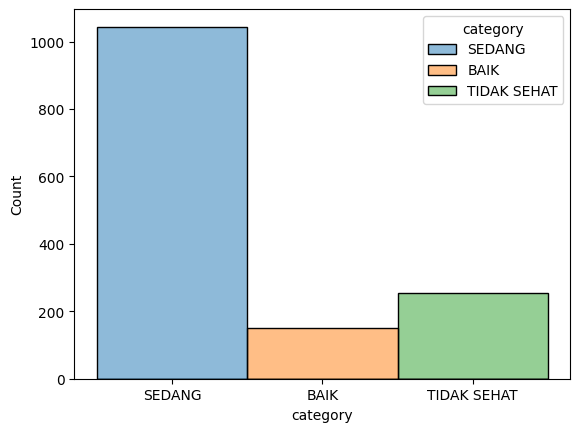

In [40]:
sns.histplot(
    data = dataset,
    x = "category",
    hue="category"
)
plt.show()

### **3.7. Outliers Check**

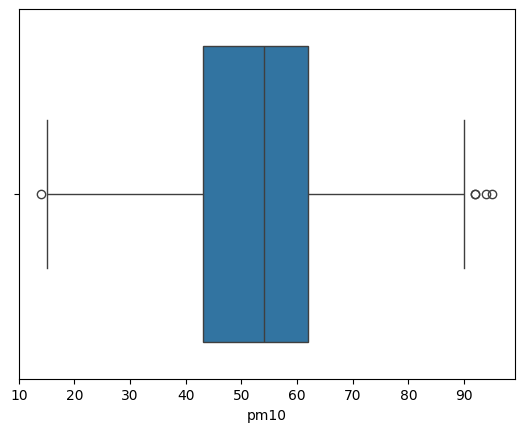

In [41]:
# pm10 boxplot.
sns.boxplot(
    data = dataset,
    x = "pm10"
)
plt.show()

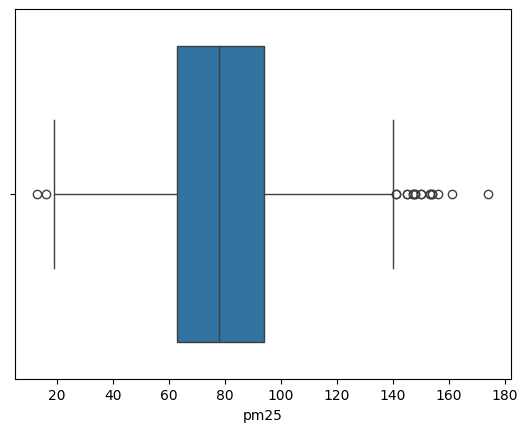

In [42]:
# pm25 boxplot.
sns.boxplot(
    data = dataset,
    x = "pm25"
)
plt.show()

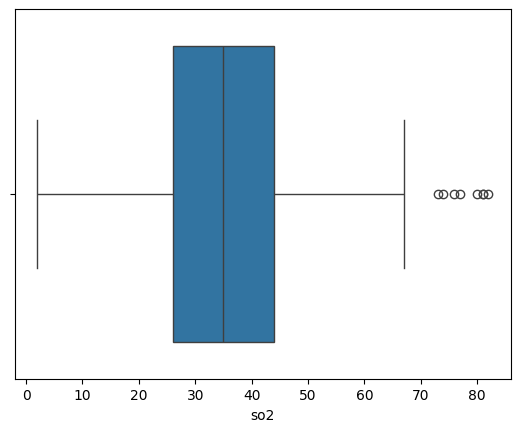

In [43]:
# so2 boxplot.
sns.boxplot(
    data = dataset,
    x = "so2"
)
plt.show()

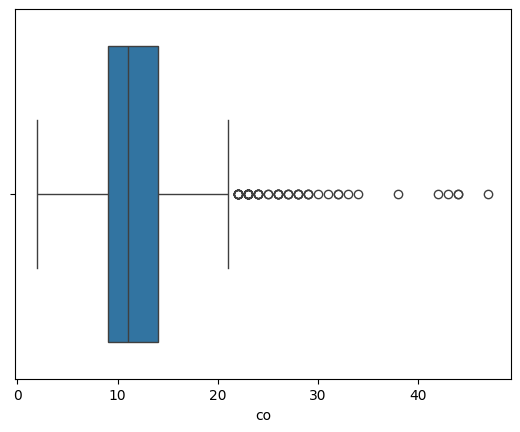

In [44]:
# co boxplot.
sns.boxplot(
    data = dataset,
    x = "co"
)
plt.show()

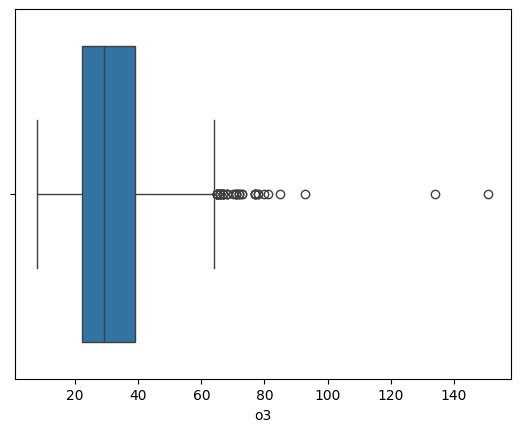

In [45]:
# o3 boxplot.
sns.boxplot(
    data = dataset,
    x = "o3"
)
plt.show()

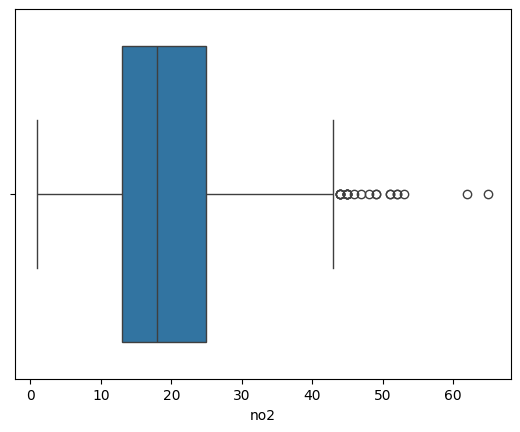

In [46]:
# no2 boxplot.
sns.boxplot(
    data = dataset,
    x = "no2"
)
plt.show()

**Summary:**
1. Missing Value Handling
   - `pm10` and `pm25` : class mean
   - `so2` : mean
   - `co`, `o3`, and `no2` : median
3. Join label `SEDANG` and `TIDAK SEHAT` into `TIDAK BAIK`
4. Label balancing `BAIK` and `TIDAK BAIK`
5. Outliers removal